In [1]:
import matplotlib.pyplot as plt
import ternary
from matplotlib import gridspec
import numpy as np
import matplotlib as mpl

### the paper has triangle position = predicted, color = true
### this is done for F(i)M/AFM/NM and for FM/FiM

In [ ]:
### rip I need the actual prediction values, i.e. the triple (prob[NM], prob[AFM], prob[FM/FiM])

In [9]:
encoding = ["NM", "AFM", "FM/FiM"]

with open('y_pred.txt', 'r') as f:
    y_pred = eval(f.read().split('\n')[1])
with open('y_test.txt', 'r') as f:
    y_test = eval(f.read().split('\n')[1])

(-0.05, 1.05, -0.1, 0.9)

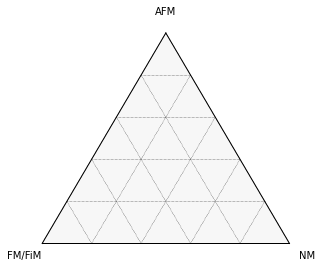

In [10]:
fig=plt.figure(constrained_layout=True,figsize=(8,4))
fontsize = 10
offset = 0.14
gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.1,height_ratios= [7,1],figure=fig)
ax = fig.add_subplot(gs[0, 0])

figure, tax = ternary.figure(ax=ax,scale=1.0)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.2, color="black")
tax.right_corner_label("NM", fontsize=fontsize)
tax.top_corner_label("AFM", fontsize=fontsize)
tax.left_corner_label("FM/FiM", fontsize=fontsize)
tax.get_axes().axis('off')

In [16]:
sc=tax.scatter(y_pred)
# sc=tax.scatter(y_pred, s=2, edgecolors='none',c=y_test, cmap=mpl.cm.cool)
tax.legend(loc='upper left',fontsize=fontsize)
ax2 = fig.add_subplot(gs[1,0])
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=2)

cb1 = mpl.colorbar.ColorbarBase(ax=ax2, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('true label')
#plt.savefig('magnetization_unit_cf0_002.pdf',format='pdf',dpi=300,bbox_inches='tight')

TypeError: 'int' object is not subscriptable